In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import segmentation_models_pytorch as smp
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "../Fourth_training_phase/WE3DS/ENB0+UNet_models/WE3DS_seg_standard_DiceLoss.pth" 

In [3]:
model = smp.Unet(
    encoder_name="efficientnet-b0",
    encoder_weights="imagenet",
    in_channels=3,
    classes=19
)

In [4]:
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

/tmp/ipykernel_2895324/1481618732.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Unet(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSamePadding

In [5]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),   # resizing
    transforms.ToTensor(),           # [0,1]
])

In [12]:
"""
class_colors = [
    (0, 0, 0), (255, 0, 0), (234, 0, 0), (212, 0, 0), (191, 0, 0), (170, 0, 0), (149, 0, 0),
    (255, 85, 0), (234, 78, 0), (212, 71, 0), (191, 64, 0), (170, 57, 0), (149, 50, 0),
    (255, 170, 0), (255, 255, 0), (170, 255, 0), (85, 255, 0), (0, 255, 0), (0, 255, 85),
    (0, 255, 170), (0, 255, 255), (0, 170, 255), (0, 85, 255), (0, 0, 255), (85, 0, 255),
    (170, 0, 255), (255, 0, 255), (255, 0, 170), (255, 0, 85), (255, 188, 178), (255, 207, 178),
    (255, 226, 178), (255, 245, 178), (245, 255, 178), (226, 255, 178), (207, 255, 178),
    (188, 255, 178), (178, 255, 188), (178, 255, 207), (178, 255, 226), (178, 255, 245),
    (178, 245, 255), (178, 226, 255), (178, 207, 255), (178, 188, 255), (188, 178, 255),
    (207, 178, 255), (226, 178, 255), (245, 178, 255), (255, 178, 245), (255, 178, 226),
    (255, 178, 207), (255, 178, 188), (255, 194, 178), (255, 213, 178), (255, 219, 178),
    (255, 232, 178), (255, 238, 178), (255, 251, 178), (255, 212, 0), (239, 255, 178),
    (233, 255, 178), (220, 255, 178), (214, 255, 178), (201, 255, 178), (195, 255, 178),
    (182, 255, 178), (178, 255, 194), (178, 255, 200), (178, 255, 213), (178, 255, 220),
    (178, 255, 232), (178, 255, 238), (178, 255, 251), (178, 239, 255), (178, 233, 255),
    (178, 220, 255), (178, 214, 255), (178, 201, 255), (178, 195, 255), (178, 182, 255),
    (194, 178, 255), (200, 178, 255), (213, 178, 255), (219, 178, 255), (232, 178, 255),
    (238, 178, 255), (251, 178, 255), (255, 178, 239), (255, 178, 233), (255, 178, 220),
    (255, 178, 214), (212, 255, 0), (127, 255, 0), (42, 255, 0), (244, 255, 0), (159, 255, 0),
    (74, 255, 0), (10, 255, 0), (202, 255, 0), (128, 128, 128)
]
"""

In [13]:
""" Converte una maschera di classi in un'immagine RGB creando un'immagine vuota per poi colorare 
i pixel della maschera con il colore corrispondente """
"""
def decode_segmap(segmentation_mask):
    h, w = segmentation_mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    for class_idx, color in enumerate(class_colors):
        color_mask[segmentation_mask == class_idx] = color
    return color_mask
"""

In [6]:
# Carica i nomi delle classi e i rispettivi colori RGB
def load_class_info(colors_path, names_path):
    with open(colors_path, 'r') as f:
        class_colors = [list(map(int, line.strip().split(','))) for line in f]
    with open(names_path, 'r') as f:
        class_names = [line.strip() for line in f]
    return np.array(class_colors), class_names

class_colors, class_names = load_class_info(
    "../WE3DS-dataset/class_colors.txt",
    "../WE3DS-dataset/class_names.txt"
)

In [7]:
def decode_segmap(mask, class_colors):
    h, w = mask.shape
    color_mask = np.zeros((h, w, 3), dtype=np.uint8)
    for class_idx, color in enumerate(class_colors):
        color_mask[mask == class_idx] = color
    return color_mask

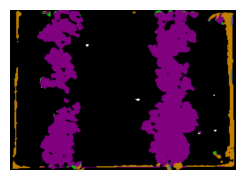

Maschera salvata in: prediction_upsampled.png


In [11]:
def predict_single_image(image_path):
    
    image = Image.open(image_path).convert("RGB")
    orig_w, orig_h = image.size 
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        mask = torch.argmax(output, dim=1)

        # --- UPSAMPLING ALLA DIMENSIONE ORIGINALE ---
        mask = mask.unsqueeze(1).float()
        mask_up = F.interpolate(mask, size=(orig_h, orig_w), mode='nearest').squeeze().long().cpu().numpy()

    # Decodifica maschera con colori
    color_mask = decode_segmap(mask_up, class_colors)

    # Visualizza immagine originale + maschera colorata
    #plt.figure(figsize=(10, 5))
    #plt.subplot(1, 2, 1)
    #plt.imshow(image)
    #plt.title("Immagine Originale")
    #plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(color_mask)
    #plt.title("Segmentazione Colorata (Upsampled)")
    plt.axis("off")

    plt.show()

    # Salva la maschera con dimensione originale
    save_path = os.path.join("prediction_upsampled.png")
    Image.fromarray(color_mask).save(save_path)
    print(f"Maschera salvata in: {save_path}")

image_path = "../images/output_2_B/clean_image.png"   #3146x2235
predict_single_image(image_path)